In [5]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.inspection import permutation_importance

pd.options.mode.chained_assignment = None  # default='warn'
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")

simplefilter(action='ignore', category=FutureWarning)


In [60]:
# Read data and delete result column
train_data_all = pd.read_csv("train_data_2010_2021.csv",delimiter=",")
test_data_all = pd.read_csv("test_data_2022.csv",delimiter=",")
# trade list


train_trades = train_data_all.loc[train_data_all['profit'] != 0]
test_trades = test_data_all.loc[test_data_all['profit'] != 0]
test_trades.columns


Index(['Unnamed: 0', 'Datetime', 'Open', 'High', 'Low', 'Close', 'EMA_value_6',
       'CCI_3', 'CCI_12', 'CCI_18', 'CCI_24', 'CCI_30', 'ADX', 'RSI_12',
       'RSI_14', 'RSI_18', 'RSI_24', 'RSI_30', 'macd', 'macdsignal',
       'macdhist', 'Bolinger_upper', 'Bolinger_middle', 'Bolinger_lower',
       'ATR', 'threeinrow_type', 'move_strength', 'move_length',
       'movemen_range', 'result', 'Entry_bar', 'Entry_price', 'exit_bar',
       'close_rice', 'profit', 'exit_price_2', 'CCI_X', 'cci_spead',
       'cci_acce', 'cci_acce_avg', 'cci_acce_tag_by_row',
       'cci_acce_prob_by_row', 'cum_pnl', 'EMA6', 'distance_tf1',
       'distance_tf2', 'rational_strength', 'entry_candle',
       'distance_bollinger', 'distance_ratio', 'EMA_distance1_tag',
       'EMA_distance1_prob', 'EMA_distance_ratio_tag',
       'EMA_distance_ratio_prob', 'rational_strength_tag',
       'rational_stregth_prob', 'entry_candle_tag', 'entry_candle_prob',
       'distace_bollinger_tag', 'distace_bollinger_prob',

In [61]:
# create trade dataframe
train_trades = train_trades[['CCI_3','ADX','RSI_12','CCI_18','move_strength','cci_acce_avg','distance_tf1','bollinger_I','macd','threeinrow_type','result',\
                 'distance_tf2','rational_strength','entry_candle','distance_ratio','degree','cci_acce']]
test_trades = test_trades[['CCI_3','ADX','RSI_12','CCI_18','move_strength','cci_acce_avg','distance_tf1','bollinger_I','macd','threeinrow_type','result',\
                 'distance_tf2','rational_strength','entry_candle','distance_ratio','degree','cci_acce','profit']]



#drop null values
train_trades = train_trades.dropna()
test_trades = test_trades.dropna()

In [62]:
#label encoding
type_encoder = preprocessing.LabelEncoder()
train_trades['threeinrow_type'] = type_encoder.fit_transform(train_trades['threeinrow_type'])
types =list(type_encoder.classes_)
coded_types = type_encoder.transform(types)
print(f'types are {types} which is encoded as {coded_types}')


type_encoder = preprocessing.LabelEncoder()
train_trades['result'] = type_encoder.fit_transform(train_trades['result'])
result =list(type_encoder.classes_)
coded_result = type_encoder.transform(result)
print(f'results are {result} which is encoded as {coded_result}')

#label encoding
type_encoder = preprocessing.LabelEncoder()
test_trades['threeinrow_type'] = type_encoder.fit_transform(test_trades['threeinrow_type'])
types =list(type_encoder.classes_)
coded_types = type_encoder.transform(types)
print(f'types are {types} which is encoded as {coded_types}')


type_encoder = preprocessing.LabelEncoder()
test_trades['result'] = type_encoder.fit_transform(test_trades['result'])
result =list(type_encoder.classes_)
coded_result = type_encoder.transform(result)
print(f'results are {result} which is encoded as {coded_result}')

types are ['bearish_3inrow', 'bullish_3inrow'] which is encoded as [0 1]
results are ['sl_hit', 'tp_hit'] which is encoded as [0 1]
types are ['bearish_3inrow', 'bullish_3inrow'] which is encoded as [0 1]
results are ['sl_hit', 'tp_hit'] which is encoded as [0 1]


In [63]:
# correct data types
train_trades['result'] = train_trades['result'].astype(np.int64)
train_trades['threeinrow_type'] = train_trades['threeinrow_type'].astype(np.int64)

#Data grouping
train_trades_bearish = train_trades[train_trades['threeinrow_type'] == 0].drop('threeinrow_type',axis=1)
train_trades_bullish = train_trades[train_trades['threeinrow_type'] == 1].drop('threeinrow_type',axis=1)

# correct data types
test_trades['result'] = test_trades['result'].astype(np.int64)
test_trades['threeinrow_type'] = test_trades['threeinrow_type'].astype(np.int64)

#Data grouping
test_trades_bearish = test_trades[test_trades['threeinrow_type'] == 0].drop('threeinrow_type',axis=1)
test_trades_bullish = test_trades[test_trades['threeinrow_type'] == 1].drop('threeinrow_type',axis=1)

In [64]:
# split test and train data
X_train_trades_bearish = train_trades_bearish.drop(columns=["result"]).values
X_train_trades_bullish = train_trades_bullish.drop(columns=["result"]).values
Y_train_trades_bearish = train_trades_bearish["result"].values
Y_train_trades_bullish = train_trades_bullish["result"].values

X_test_trades_bearish = test_trades_bearish.drop(columns=["result"])
X_test_trades_bullish = test_trades_bullish.drop(columns=["result"])
Y_test_trades_bearish = test_trades_bearish["result"]
Y_test_trades_bullish = test_trades_bullish["result"]

In [65]:
print(f'X_train_trades_bearish {X_train_trades_bearish.shape}, X_train_trades_bullish {X_train_trades_bullish.shape}, Y_train_trades_bearish {Y_train_trades_bearish.shape},Y_train_trades_bullish {Y_train_trades_bullish.shape}')


X_train_trades_bearish (1191, 15), X_train_trades_bullish (1311, 15), Y_train_trades_bearish (1191,),Y_train_trades_bullish (1311,)


In [66]:
# Data Normalization
scaler = StandardScaler()
X_train_trades_bearish = pd.DataFrame(scaler.fit_transform(X_train_trades_bearish))
X_train_trades_bullish = pd.DataFrame(scaler.fit_transform(X_train_trades_bullish))


In [67]:
# create SVM model
BearishSVM =  svm.SVC(C=0.1,gamma='auto',kernel='sigmoid')
BearishSVM.fit(X_train_trades_bearish,Y_train_trades_bearish)


# BullishSVM =  svm.SVC(C=0.05,gamma='scale',kernel='sigmoid')
BullishSVM =  svm.SVC(C=0.1,gamma='auto',kernel='sigmoid')
BullishSVM.fit(X_train_trades_bullish,Y_train_trades_bullish)


SVC(C=0.1, gamma='auto', kernel='sigmoid')

In [68]:
# drop profit column from test datat
X_test_trades_bearish = X_test_trades_bearish.drop('profit',axis=1)
X_test_trades_bullish = X_test_trades_bullish.drop('profit',axis=1)

In [69]:
# predict trade result
test_trades_bearish['predicted_result'] = BearishSVM.predict(X_test_trades_bearish)
test_trades_bullish['predicted_result'] = BullishSVM.predict(X_test_trades_bullish)


model is fitted and predicted for bearish dataset
              precision    recall  f1-score   support

           0       0.38      0.22      0.28        36
           1       0.67      0.81      0.74        70

    accuracy                           0.61       106
   macro avg       0.53      0.52      0.51       106
weighted avg       0.57      0.61      0.58       106

The Accuracy for Bearsh Test Set is 61.32075471698113


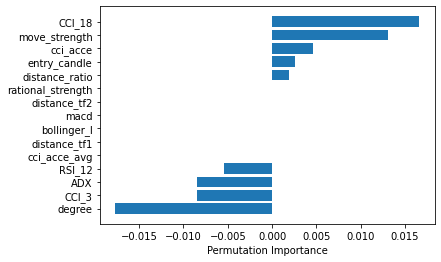

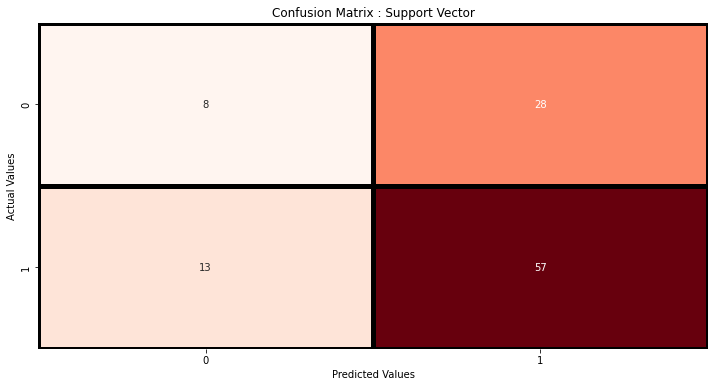

In [70]:
# feature iportance analysis
perm_importance = permutation_importance(BearishSVM, X_test_trades_bearish, Y_test_trades_bearish,n_repeats=100,random_state=0)
feature_names =  test_trades_bearish.drop('result',axis=1).columns
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

print('model is fitted and predicted for bearish dataset')

#Confusion matrix for BEARISH
cm=confusion_matrix(Y_test_trades_bearish,test_trades_bearish['predicted_result'])
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix : Support Vector")
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds',linewidths=5,linecolor='black',cbar=False)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

print(classification_report(Y_test_trades_bearish, test_trades_bearish['predicted_result'])) 
test_acc_bearish = accuracy_score(Y_test_trades_bearish, test_trades_bearish['predicted_result'])
print("The Accuracy for Bearsh Test Set is {}".format(test_acc_bearish*100))

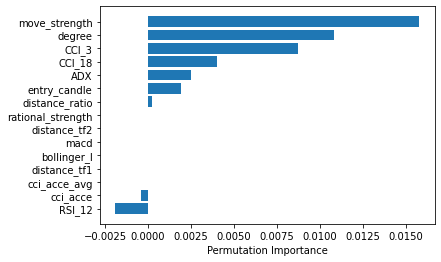

model is fitted and predicted for bearish dataset


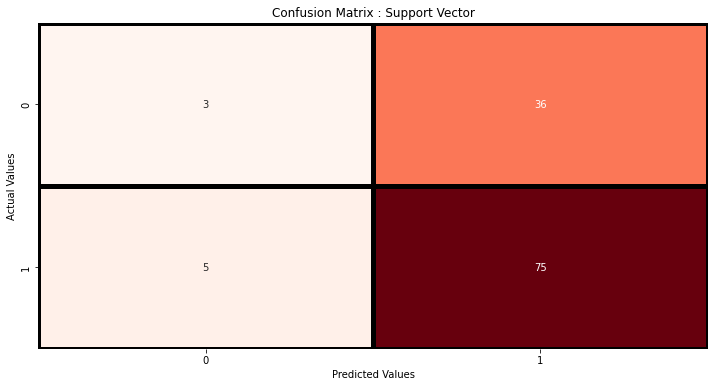

              precision    recall  f1-score   support

           0       0.38      0.08      0.13        39
           1       0.68      0.94      0.79        80

    accuracy                           0.66       119
   macro avg       0.53      0.51      0.46       119
weighted avg       0.58      0.66      0.57       119

The Accuracy for Bullish Test Set is 65.54621848739495


In [71]:
# feature iportance analysis
perm_importance = permutation_importance(BullishSVM, X_test_trades_bullish, Y_test_trades_bullish,n_repeats=100,random_state=0)
feature_names =  test_trades_bullish.drop('result',axis=1).columns
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()
print('model is fitted and predicted for bearish dataset')

#Confusion matrix for Bullish
cm=confusion_matrix(Y_test_trades_bullish,test_trades_bullish['predicted_result'])
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix : Support Vector")
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds',linewidths=5,linecolor='black',cbar=False)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()
print(classification_report(Y_test_trades_bullish, test_trades_bullish['predicted_result'])) 
test_acc_bullish = accuracy_score(Y_test_trades_bullish, test_trades_bullish['predicted_result'])
print("The Accuracy for Bullish Test Set is {}".format(test_acc_bullish*100))

In [74]:
# Create Kmeans Model
bearish_kmeans = KMeans(
           init="k-means++",
           n_clusters=5,
           n_init=10,
           max_iter=300,
           random_state=42
  )


bullish_kmeans = KMeans(
           init="k-means++",
           n_clusters=5,
           n_init=10,
           max_iter=300,
           random_state=42
  )


In [75]:
bearsih_kmeans_model = bearish_kmeans.fit(X_train_trades_bearish)
bullsih_kmeans_model = bullish_kmeans.fit(X_train_trades_bullish)

In [76]:
# labels for train data
bearish_labels =bearish_kmeans.labels_
unique, counts = np.unique(bearish_labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 121]
 [  1 427]
 [  2 264]
 [  3   3]
 [  4 376]]


In [77]:
# predict labels for test data
test_trades_bearish['predicted_cluster'] = bearsih_kmeans_model.predict(X_test_trades_bearish)
test_trades_bullish['predicted_cluster'] = bullsih_kmeans_model.predict(X_test_trades_bullish)

In [78]:
#reset index 
test_trades_bearish = test_trades_bearish.reset_index()
test_trades_bullish=test_trades_bullish.reset_index()

In [79]:
# create a summry table for predicted labels
bearish_clusters =pd.DataFrame()
bearish_clusters['trades'] = test_trades_bearish.groupby('predicted_cluster')['index'].count()
bearish_clusters['wins'] = test_trades_bearish.loc[test_trades_bearish['result']==1].groupby('predicted_cluster')['index'].count()
bearish_clusters['winrate'] =bearish_clusters['wins'] / bearish_clusters['trades']
print(bearish_clusters)
test_trades_bearish['cluster_Vol.'] = test_trades_bearish.loc[test_trades_bearish['predicted_cluster']<=0.62] = 0 
test_trades_bearish['cluster_Vol.'] = test_trades_bearish.loc[(test_trades_bearish['predicted_cluster']>0.62)&(test_trades_bearish['predicted_cluster']<=0.69)] = 1 
test_trades_bearish['cluster_Vol.'] = test_trades_bearish.loc[test_trades_bearish['predicted_cluster']>=70] = 2

bullish_clusters =pd.DataFrame()
bullish_clusters['trades'] = test_trades_bullish.groupby('predicted_cluster')['index'].count()
bullish_clusters['wins'] = test_trades_bullish.loc[test_trades_bullish['result']==1].groupby('predicted_cluster')['index'].count()
bullish_clusters['winrate'] =bullish_clusters['wins'] /bullish_clusters['trades']
print(bullish_clusters)
test_trades_bullish['cluster_Vol.'] = test_trades_bullish.loc[test_trades_bullish['predicted_cluster']<=0.62] = 0 
test_trades_bullish['cluster_Vol.'] = test_trades_bullish.loc[(test_trades_bullish['predicted_cluster']>0.62)&(test_trades_bullish['predicted_cluster']<=0.69)] = 1 
test_trades_bullish['cluster_Vol.'] = test_trades_bullish.loc[test_trades_bullish['predicted_cluster']>=70] = 2


                   trades  wins   winrate
predicted_cluster                        
0                      25    13  0.520000
2                      62    46  0.741935
3                      19    11  0.578947
                   trades  wins   winrate
predicted_cluster                        
1                     119    80  0.672269


In [ ]:
# merge predicted values to prepare it for summerize
predicted_trades = test_trades_bearish.append(test_trades_bullish)
predicted_trades = predicted_trades.sort_values('index')


In [ ]:
#predicted_trades.to_csv('dd.csv')

In [ ]:
predicted_trades['modified_profit'] = predicted_trades['profit'] * predicted_trades['cluster_Vol.'] * predicted_trades['predicted_result']
predicted_trades['profit_cum_sum'] = predicted_trades['profit'].cumsum()
predicted_trades['modified_profit_cum_sum'] = predicted_trades['modified_profit'].cumsum()


In [ ]:
ax = plt.gca()
predicted_trades.plot(kind='line',x='index',y='profit_cum_sum',ax=ax)
predicted_trades.plot(kind='line',x='index',y='modified_profit_cum_sum', color='red', ax=ax)
plt.show()